## Simulación Numérica con NumPy - Análisis de Caminatas Aleatorias

### Objetivo: Utilizar NumPy para realizar simulaciones numéricas, en particular, para modelar y analizar caminatas aleatorias

## Primera Parte: Caminata aleatoria en una dimensión

### Una caminata

Comenzamos realizando una caminata aleatoria en una dimensión. En primer lugar, simularemos la caminata. Para ello, vamos a importar aalas llibrerías numpy, matplotlib.pyplot y random. Posteriormente, propondremos un número de pasos para que corra nuestra simulación (de igual forma, se puede hacer el código para que un usuario ingrese el número de pasos de forma manual). Supondremos que la posición inicial de la caminata será el origen del eje y. Buscamos que la posición respecto al eje y cambie con cada paso pues esto dará la ilusión de que, en efecto, se está realizando una caminata. El código decide aleatoriamente si se da un paso hacia +y o hacia -y, de tal forma que la nueva posición se tiene que guardar y asociar con un número de paso.

In [17]:
# Importemos las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
import random

# Determinemos el número de pasos que queremos dar
#n = int(input("¿Cuántos pasos quieres dar?"))
n = 500

# Elegimos la posición inicial
posicion = 0

# Hagamos una lista de posiciones comenzando por la posición inicial
posiciones = [posicion]

# Para cada paso, hagamos que el código decida si dar un paso hacia adelante (+1) o hacia atrás (-1)
for _ in range(n):
    paso = random.choice([-1,1])
    posicion += paso # Sumemos la decisión del código a la posición inicial para cmabiar la posición de la caminata
    posiciones.append(posicion) # Agregamos al nueva posición a la lista de posiciones

arr_posiciones = np.array(posiciones) # Volvamos a la lista anterior un array de NumPy

Ahora bien, una vez que tenemos la relación entre el número de paso y la posición actual de nuestro "caminante", entonces ya tenemos los elementos necesarios para poder realizar una gráfica que nos permita visualizar la trayectoria. Para lograr esto, hacemos uso de la librería matplotlib. Con el objetivo de tener una mejor visualización, colocamos el título de la gráfica de tal forma que este se modifique de acuerdo al número de pasos que se elijan dar y mostramos las etiquetas de "Número de pasos" y "Posición" en los ejes x y y respectivamente. Por último, una cuadrícula en el fondo nos puede ayudar a ver mejor las posiciones representadas en la gráfica, en especial, la posición inicial, donde puede apreciarse claramente que el "caminante" comienza en la coordenada (0,0).

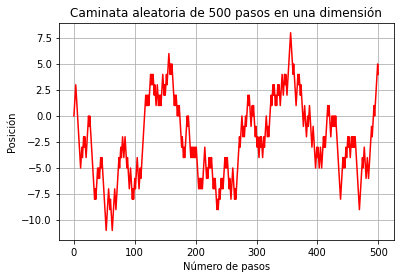

In [18]:
# Grafiquemos la posición de la caminata contra el número de pasos
plt.plot(arr_posiciones, color='red')
plt.title(f'Caminata aleatoria de {n} pasos en una dimensión')
plt.xlabel('Número de pasos')
plt.ylabel('Posición')
plt.grid(True)
plt.show()

Con la visualización ya realizada, ahora pasaremos a hacer el análisis estadístico de la caminata. Buscamos calcular datos estadísticos relevantes como lo son las medidas de tendencia central y la distribución de las posiciones que abarca la caminata.

La desviación estandar para las posiciones es de 3.737
La mediana de las posiciones registradas es de -3.0


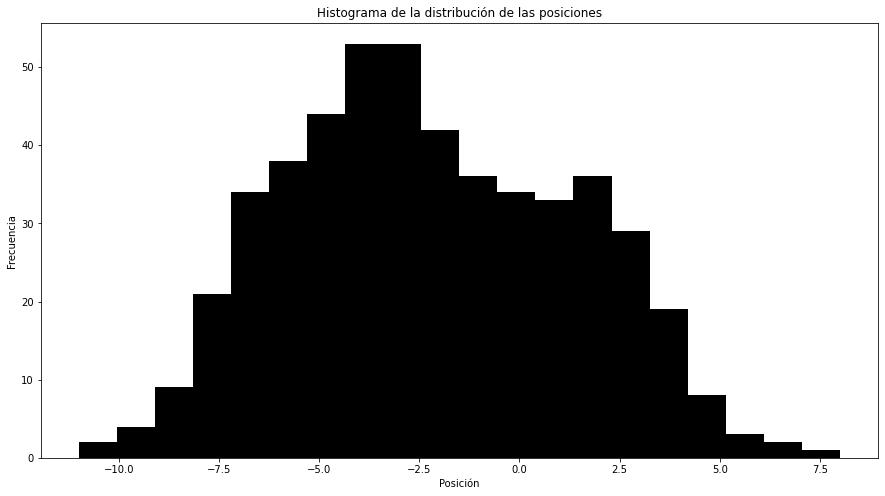

In [39]:
#Obtengamos la desviación estandar
std = np.std(arr_posiciones)
print(f'La desviación estandar para las posiciones es de {std:.3f}')

#Calculemos la mediana
mediana = np.median(arr_posiciones)
print(f'La mediana de las posiciones registradas es de {mediana}')

plt.figure(figsize=(15,8))
#Ahora, graficaremos la distribución de las posiciones en un histograma
plt.hist(arr_posiciones, bins=20, color='black')
plt.title('Histograma de la distribución de las posiciones')
plt.xlabel('Posición')
plt.ylabel('Frecuencia')

plt.show()


Como podemos apreciar a simple vista, la figura representada tiene una forma muy similar a la distribución normal. Para estar más seguros de esta afirmación, será necesario comparar esta gráfica con una distribución normal. Para ello, primero se hará el cálculo de la media de los datos para, posteriormente, realizar un proceso de estandarización que nos permita comparar los datos obtenidos con una distribución normal estándar. Al mismo tiempo, compararemos esto con otro tipo de distribución, por ejemplo, la uniforme.

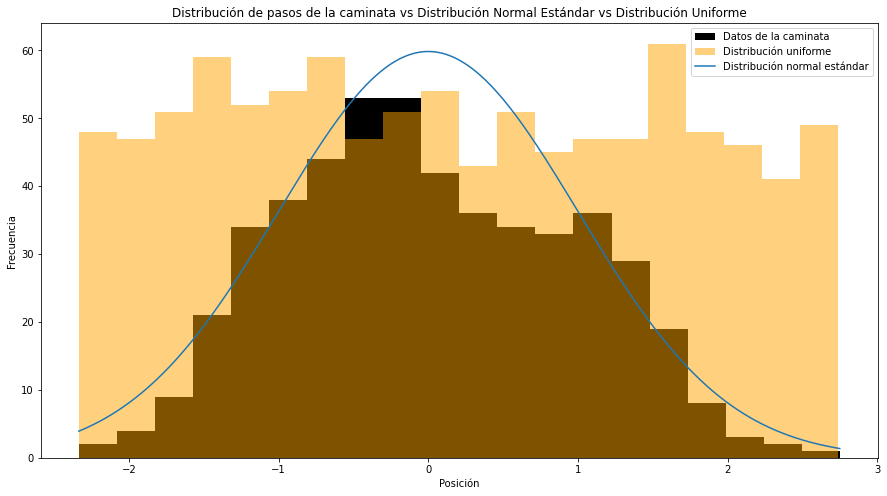

In [43]:
from scipy.stats import norm

#Para lo siguiente, es conveniente calcular la media de los últimos datos
mu = np.mean(arr_posiciones)

#Realizamos el proceso de estandarización
Z = (arr_posiciones - mu)/std

#Procedemos a construir la distribución normal y la uniforme para comparar los datos obtenidos
nor_x = np.linspace(min(Z), max(Z), 1000) #Definimos los parámetros de la distribución normal
nor_y = norm.pdf(nor_x, 0, 1)*150 #Modificamos la PDF para escalar adecuadamente la gráfica

#Distribución uniforme
unif = np.random.uniform(min(Z), max(Z), 1000)

plt.figure(figsize=(15,8))
plt.hist(Z, bins=20, color='black', label='Datos de la caminata')
plt.hist(unif, bins=20, alpha=0.5, color='orange', label='Distribución uniforme')
plt.plot(nor_x, nor_y, label='Distribución normal estándar')
plt.title('Distribución de pasos de la caminata vs Distribución Normal Estándar vs Distribución Uniforme')
plt.xlabel('Posición')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

### Varias caminatas

Llevemos esta simulación a una mayor escala, es decir, ejecutaremos de manera simultánea múltiples caminatas aleatorias y buscaremos visualizar sus respectivas representaciones gráficas. Una vez hecho esto, lo que se necesita es observar patrones y comportamiento agregado. De modo que, en lo siguiente, repetiremos el mismo proceso 'p' veces, sin embargo, para poder tener una mayor claridad en las gráficas, en éstas sólo se dibujarán 10 de los procesos

In [21]:
#Definamos el número de caminatas aleatorias que queremos como p
p = 500

#Realicemos una lista donde se guardarán todas las caminatas 
camin = []

# Repetiremos el proceso 100 veces, así que metemos el proceso anterior en un ciclo for
for _ in range(p):
    p_0 = 0 #Queremos que la posición inicial siempre sea 0
    posit = [p_0] #El primer elemento de la lista de posiciones debe ser la posición 0 
    for _ in range(n):
        paso = random.choice([-1,1])
        p_0 += paso
        posit.append(p_0) 
    pos = np.array(posit)
    camin.append(pos)


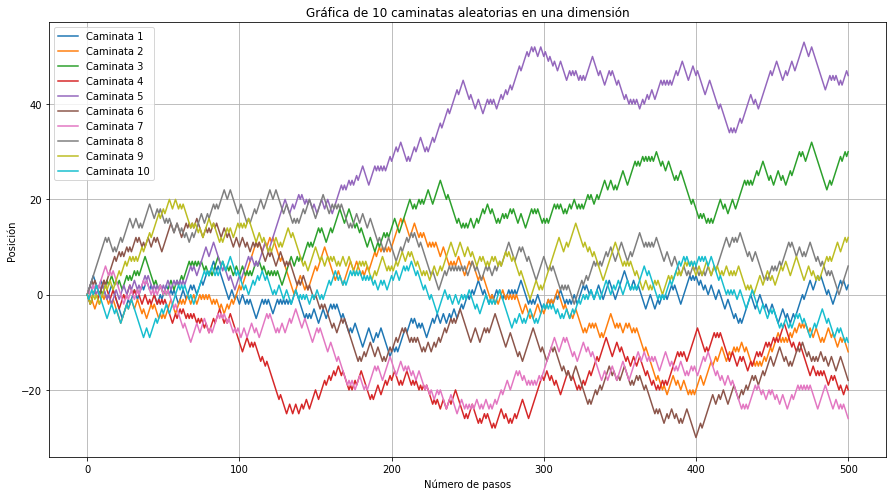

In [22]:
#Ahora, procedemos a graficar todas nuestras trayectorias hechas anteriormente
labels = [f'Caminata {i+1}' for i in range(10)] #Esta lista contendrá todas las etiquetas para las leyendas correspondientes a cada caminata

plt.figure(figsize=(15,8)) #Proponemos un buen tamaño de imagen para apreciar el gráfico adecuadamente

#Colocamos un ciclo for para graficar todas las trayectorias contenidas en la lista camin
for k, (y, label) in enumerate(zip(camin[:10], labels)): #Asociamos un índice con el par (datos de la caminata, etiqueta)
    plt.plot(y, label=label) #Graficamos cada trayectoria y la asociamos con cada una de las leyendas. A cada una se le asiganrá un color en el gráfico

plt.title('Gráfica de 10 caminatas aleatorias en una dimensión')
plt.xlabel('Número de pasos')
plt.ylabel('Posición')
plt.legend()
plt.grid(True)
plt.show()

En el gráfico anterior podemos ver como las caminatas son muy distintas entre ellas. En los primeros pasos se puede apreciar cómo todas las trayectorias son muy cercanas, pero, a medida que se dan más pasos, las trayectorias comienzan a alejarse cada vez más. Incluso, para el paso número 100, ya comienzan a verse notablemente separadas. Después, podemos resaltar la existencia de algunas zonas donde algunas de las trayectorias son cercanas y después vuelven a alejarse. Finalmente, también se puede destacar que todas las posiciones finales son, en apariencia, únicas.

A continuación, trataremos de determinar si es que, a pesar de lo diferentes que son las posiciones donde acaban las caminatas, estas siguen alguna distribución de probabilidad. En principio, esperaríamos que se siga la distribución normal, de tal forma que los valores cercanos al promedio formado por las posiciones finales son más probables.

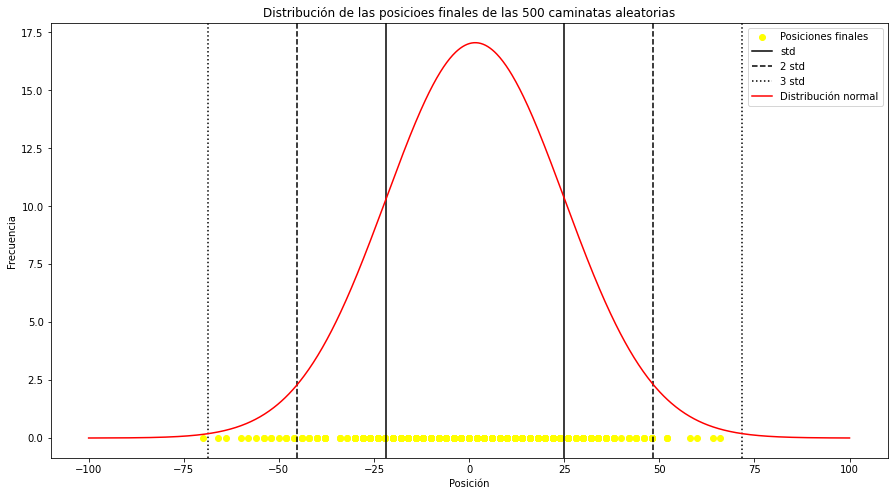

In [48]:
import numpy as np
#La siguiente lista se encargará de contener todas las posiciones finales de las caminatas hechas, es decir, contiene 500 datos
fin_pos_mult = []

#Guardamos las posiciones
for j in range(p):
    fin_pos_mult.append(camin[j][-1])

#Lo volvemos un array y calculamos la media y la desviación estándar
fin_pos_mult = np.array(fin_pos_mult)
sigma = np.std(fin_pos_mult)
miu = np.mean(fin_pos_mult)

#Determinamos los parámetros de la distribución normal
Nor_x = np.linspace(-100, 100, 1000)
Nor_y = norm.pdf(Nor_x, miu, sigma)*1000

#Ajustamos todos los elementos que queremos ver en nuetra gráfica
plt.figure(figsize=(15,8))
#Esto hará que las posiciones finales se acumulen en el fondo de la gráfica
plt.scatter(fin_pos_mult, np.zeros(p), color='yellow', label='Posiciones finales') 
plt.axvline(x=miu + sigma, color='black', linestyle='-', label='std') #Marcamos el valor de la std
plt.axvline(x=miu - sigma, color='black', linestyle='-')
plt.axvline(x=miu + 2*sigma, color='black', linestyle='--', label='2 std') #Marcamos el valor de 2std
plt.axvline(x=miu - 2*sigma, color='black', linestyle='--')
plt.axvline(x=miu + 3*sigma, color='black', linestyle='dotted', label='3 std') #Marcamos el valor de 3std
plt.axvline(x=miu - 3*sigma, color='black', linestyle='dotted')
plt.plot(Nor_x, Nor_y, color='red', label='Distribución normal') #Distribución normal
plt.title(f'Distribución de las posicioes finales de las {p} caminatas aleatorias')
plt.xlabel('Posición')
plt.ylabel('Frecuencia')
plt.legend()

plt.show()


En la figura de arriba, se puede apreciar que los valores de las posiciones finales se acumulan, en mayor medida, cerca de donde la campana alcanza su valor máximo, es decir, alrededor del promedio de dichos valores. Hagamos una prueba final para asegurarnos de que nuestra predicción hecha anteriormente es correcta. Si todo va bien, en el intervalo [-std, std] deberían de estar, aproximadamente, el 68% de los datos, en [-2std, 2std] el 95% y en [-3std, 3std] el 99.7%:

In [38]:
prim_std, seg_std, ter_std = 0, 0, 0

for l in fin_pos_mult:
    if miu - 3*sigma <= l <= miu + 3*sigma:
        ter_std += 1
        if miu - 2*sigma <= l <= miu + 2*sigma:
            seg_std += 1
            if miu - sigma <= l <= miu + sigma:
                prim_std += 1

print(f'En el primer intervalo están el {100*(prim_std/len(fin_pos_mult)):.1f}% de los datos, en el segundo el {100*(seg_std/len(fin_pos_mult)):.1f}% y en el último el {100*(ter_std/len(fin_pos_mult)):.1f}%.')

En el primer intervalo están el 68.8% de los datos, en el segundo el 95.4% y en el último el 99.8%.


Dado que se cumple lo previsto, podemos afirmar, ahora sí, que las posiciones finales de las 'p' caminatas dadas siguen una distribución normal.

## Segunda Parte: Caminata aleatoria en dos dimensiones

### Una caminata

Ahora, hagamos lo propio para la versión en dos dimensiones. Comencemos, al igual que antes, colocando la cantidad de pasos que necesitamos para realizar la caminata aleatoria. Como podremos apreciar, al tener ahora dos dimensiones, será importante adaptar el prcedimiento anterior a cada componente, x y y. Nuevamente, la posición inicial debe ser el origen, es decir, (0,0). En esta ocasión tendremos 2 listas de posiciones; una para cada componente. En esta ocasión podemos interpretar que tendremos un paso hacia al frente o hacia atras en el eje y, y uno a la derecha o a la izquierda sobre el eje x, esto es, se da un paso aleatorio en cada componente. El resto de los pasos son análogos, pero cabe destacar que al graficar, esta vez tendremos una fiel representación de la caminata misma, con esto queremos decir que, en vez de graficar el número de pasos contra la posición, ahora se ilustra la posición en x contra la de y.

In [25]:
#Importemos las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
import random

#Decidimos el número de pasos que queremos dar
#m = int(input("¿Cuántos pasos quieres dar?"))
m = 1000
#Determinemos la posición inicial separada en componentes x_0, y_0. Esta corresponde al origen (0,0)
x_0 = 0
y_0 = 0

#Definimos las listas donde colocaremos las posiciones en cada eje
posiciones_x = [x_0]
posiciones_y = [y_0]

#De forma análoga al proceso anterior, damos un paso adelante o atrás (en el eje y) y uno a la derecha o izquierda (en el eje x)
for _ in range(m):
    paso_x = random.choice([-1,1]) # Paso a la derecha o ala izquierda
    paso_y = random.choice([-1,1]) # Paso hacia adelante o hacia atrás
    x_0 += paso_x # Cada paso cambia la posición inicial
    y_0 += paso_y
    posiciones_x.append(x_0) # Añadimos los pasos dados en cada componente
    posiciones_y.append(y_0)

#Formemos un par de arrays con todas las posiciones separadas en cada componente
x = np.array(posiciones_x)
y = np.array(posiciones_y)


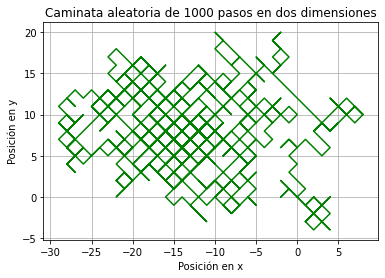

In [26]:
#Grafiquemos las posiciones sabiendo que a cada elemento del array x le corresponde uno de y
plt.plot(x, y, color='green')
plt.title(f'Caminata aleatoria de {m} pasos en dos dimensiones')
plt.xlabel('Posición en x')
plt.ylabel('Posición en y')
plt.grid(True)
plt.show()

¿Existirán distancias más probables que otras o todas las distancias respecto al origen tienen la misma probabilidad de aparecer? Determinemos esto usando la distancia euclidiana, normalizando nuestros datos y comparando los resultados con la distribución normal y, por ejemplo, la uniforme.

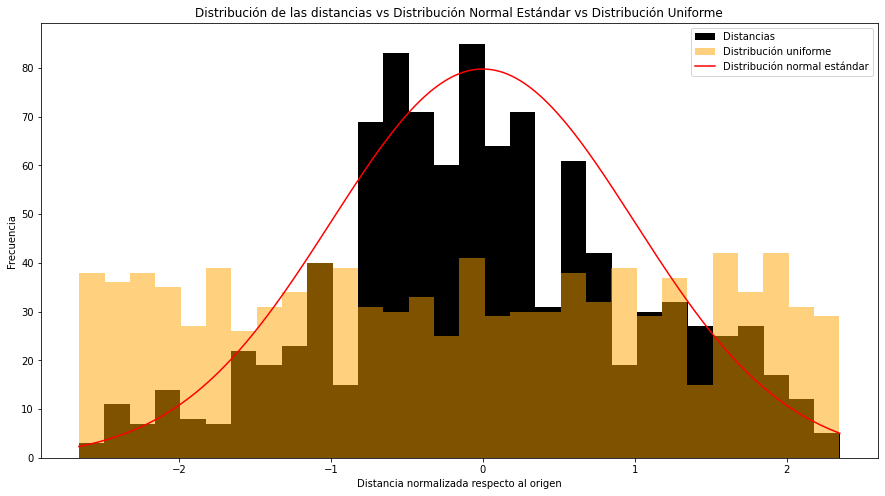

In [27]:
from math import sqrt
import matplotlib.pyplot as plt
from scipy import stats

#Obtenemos las distancias
distances = np.array([sqrt(x[M]**2 + y[M]**2) for M in range(m)])
dis_mu = np.mean(distances)     #Calculamos el promedio
dis_std = np.std(distances)     #y la desviación estándar
Z_dis = (distances - dis_mu)/dis_std        #Normalización

#Configuramos la distribución normal
Nor_x = np.linspace(min(Z_dis), max(Z_dis), 1000)
Nor_y = stats.norm.pdf(Nor_x, 0, 1)*200

#y la distribución uniforme
dis_unif = np.random.uniform(min(Z_dis), max(Z_dis), 1000)

#Veamos la gráfica
plt.figure(figsize=(15,8))
plt.hist(Z_dis, bins=30, color='black', label='Distancias')
plt.hist(dis_unif, bins=30, alpha=0.5, color='orange', label='Distribución uniforme')
plt.plot(Nor_x, Nor_y, color='red', label='Distribución normal estándar')
plt.title('Distribución de las distancias vs Distribución Normal Estándar vs Distribución Uniforme')
plt.xlabel('Distancia normalizada respecto al origen')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

Como podemos ver, los datos sobre las distancias se ajustan bastante bien a la distribución normal, no así para la distribución uniforme.

### Varias caminatas

En lo siguiente, repetiremos el procedimiento para más caminatas aleatorias como se hizo antes. Haremos el proceso de generar P caminatas aleatorias simultaneas con el mismo número de pasos y, posteriormente, graficaremos las trayectorias. Al igual que antes, para tener una representación gráfica más clara de las trayectorias, sólo visualizaremos 10 a continuación.

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import random

#Número de pasos
m = 1000

#Número de caminatas aleatorias
P = 100

#Realicemos un par de listas donde se guardarán todas las caminatas en dos dimensiones 
camin_x = []
camin_y = []

#Repetiremos el proceso P veces, así que metemos el proceso anterior en un ciclo for
for i in range(P):
    px_0 = 0 #Queremos que la posición inicial siempre sea 0 en ambas coordenadas
    py_0 = 0
    posit_x = [px_0] #El primer elemento de la lista de posiciones debe ser la posición 0 
    posit_y = [py_0]
    for _ in range(m):
        paso_x = random.choice([-1,1])
        paso_y = random.choice([-1,1])
        px_0 += paso_x
        py_0 += paso_y
        posit_x.append(px_0)
        posit_y.append(py_0)
    
    x_mul = np.array(posit_x)
    y_mul = np.array(posit_y)
    
    camin_x.append(x_mul)
    camin_y.append(y_mul)

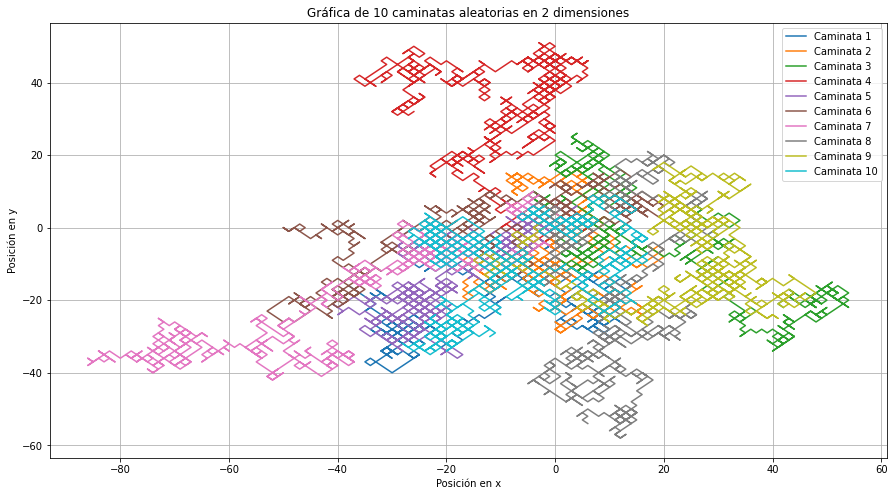

In [29]:
#Ahora, procedemos a graficar 10 de nuestras trayectorias hechas anteriormente
labels = [f'Caminata {i+1}' for i in range(10)] #Esta lista contendrá todas las etiquetas para las leyendas correspondientes a cada caminata

plt.figure(figsize=(15,8)) #Proponemos un buen tamaño de imagen para apreciar el gráfico adecuadamente

#Colocamos un ciclo for para graficar todas las trayectorias contenidas en las listas camin_x y camin_y
for k, (x, y, label) in enumerate(zip(camin_x[:10], camin_y[:10], labels)): #Asociamos un índice con los datos del eje x, los del eje y y las etiquetas
    plt.plot(x, y, label=label) #Graficamos cada trayectoria y la asociamos con cada una de las leyendas

plt.title('Gráfica de 10 caminatas aleatorias en 2 dimensiones')
plt.xlabel('Posición en x')
plt.ylabel('Posición en y')
plt.legend()
plt.grid(True)
plt.show()

Sabemos que, de forma independeiente, las posiciones finales en los ejes x y y tendrán una distribución normal. Sin embargo, ¿cambiará en algo esta distribución para la distancia que hay entre la posición final y la inicial (el origen)? Recordemos que la distancia depende de la raíz cuadrada de la suma de los cuadrados de cada componente de la posición final, entonces, lo que se hará es obtener este valor y guardarlo en un nuevo arreglo que contrendrá todas las distancias de cada caminata. Posteriormente, al igual que en el proceso análogo, graficaremos respecto a la distribución normal y veremos si esta es seguida por la distribución de las distancias. Para ello, además de la comparación visual, haremos la comparación con los valores esperados dentro de los intervalos definidos por la desviación estándar.

In [30]:
#Buscamos obtener las distancias recorridas en cada caminata
from math import sqrt

dist = []
for i in range(P):
    dist.append(sqrt(camin_x[i][-1]**2 + camin_y[i][-1]**2))

distance = np.array(dist)
sigma_d = np.std(distance)
mu_d = np.mean(distance)

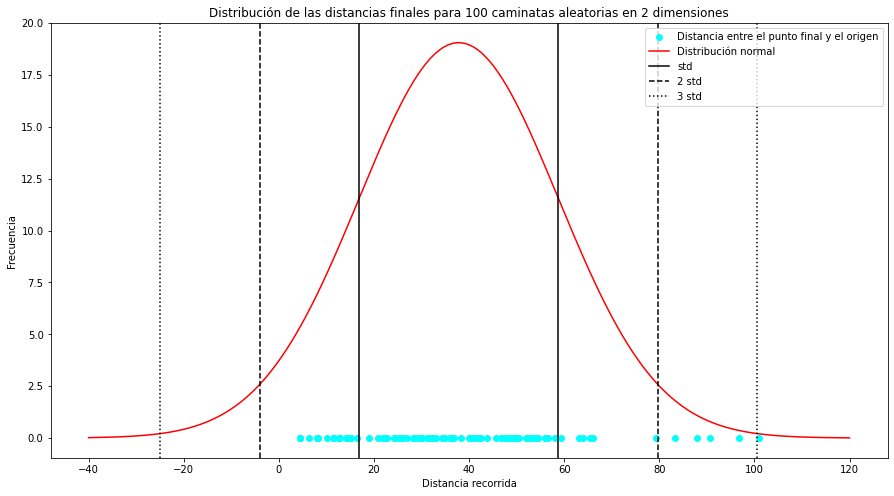

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

Nor_x = np.linspace(-40, 120, 1000)
Nor_y = stats.norm.pdf(Nor_x, mu_d, sigma_d)*1000

plt.figure(figsize=(15,8))
plt.scatter(dist, np.zeros(P), color='cyan', label='Distancia entre el punto final y el origen')
plt.plot(Nor_x, Nor_y, color='red', label='Distribución normal')
plt.axvline(x=mu_d + sigma_d, color='black', linestyle='-', label='std') #Marcamos el valor de la std
plt.axvline(x=mu_d - sigma_d, color='black', linestyle='-')
plt.axvline(x=mu_d + 2*sigma_d, color='black', linestyle='--', label='2 std') #Marcamos el valor de 2std
plt.axvline(x=mu_d - 2*sigma_d, color='black', linestyle='--')
plt.axvline(x=mu_d + 3*sigma_d, color='black', linestyle='dotted', label='3 std') #Marcamos el valor de 3std
plt.axvline(x=mu_d - 3*sigma_d, color='black', linestyle='dotted')
plt.title(f'Distribución de las distancias finales para {P} caminatas aleatorias en 2 dimensiones')
plt.xlabel('Distancia recorrida')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


In [32]:
p_std, s_std, t_std = 0, 0, 0

for l in distance:
    if mu_d - 3*sigma_d <= l <= mu_d + 3*sigma_d:
        t_std += 1
        if mu_d - 2*sigma_d <= l <= mu_d + 2*sigma_d:
            s_std += 1
            if mu_d - sigma_d <= l <= mu_d + sigma_d:
                p_std += 1

print(f'En el primer intervalo están el {100*(p_std/len(distance))}% de los datos,' 
      f' en el segundo el {100*(s_std/len(distance))}% y en el último el {100*(t_std/len(distance))}%.')

En el primer intervalo están el 69.0% de los datos, en el segundo el 95.0% y en el último el 99.0%.


Por lo tanto, podemos afirmar que, al ser parecidos los valores con la cantidad de datos esperados, la distribución seguida por las distancias de las posiciones finales respecto a la inicial de cada caminata es la distribución normal.